In [2]:
#최적의 하이퍼파라미터를 차즌 과정 = 그리드 서치, 랜덤탐색

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
data=pd.read_csv('Fvote.csv', encoding='utf-8')

In [5]:
x=data[data.columns[1:13]]
y=data[['vote']]

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,stratify=y,random_state=42)

In [16]:
#그리드서치
from sklearn.model_selection import GridSearchCV
param_grid={'C' : [0.001, 0, 0.1, 0.1, 1, 10, 100 ]}

In [13]:
from sklearn.linear_model import LogisticRegression

In [18]:
grid_search=GridSearchCV(LogisticRegression(), param_grid, cv=5, return_train_score=True)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0, 0.1, 0.1, 1, 10, 100]},
             return_train_score=True)

In [20]:
print("best parameter: {}".format(grid_search.best_params_))
print("best cross-validity score: {:.3f}".format(grid_search.best_score_))

best parameter: {'C': 10}
best cross-validity score: 0.727


In [22]:
print("test set score: {:.3f}".format(grid_search.score(x_test, y_test)))

test set score: 0.679


In [24]:
result_grid=pd.DataFrame(grid_search.cv_results_)
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005181,0.000972,0.001396,4.891036e-04,0.001,{'C': 0.001},0.68750,0.71875,0.71875,0.709677,...,0.708871,0.011430,6,0.714286,0.706349,0.706349,0.708661,0.708661,0.708861,0.002903
1,0.001399,0.000494,0.000000,0.000000e+00,0,{'C': 0},NaN,NaN,NaN,NaN,...,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.006576,0.000483,0.001196,3.981117e-04,0.1,{'C': 0.1},0.71875,0.71875,0.71875,0.677419,...,0.721573,0.030797,3,0.738095,0.746032,0.738095,0.740157,0.716535,0.735783,0.010053
3,0.006588,0.000494,0.000997,2.431402e-07,0.1,{'C': 0.1},0.71875,0.71875,0.71875,0.677419,...,0.721573,0.030797,3,0.738095,0.746032,0.738095,0.740157,0.716535,0.735783,0.010053
4,0.008970,0.000631,0.001197,3.990650e-04,1,{'C': 1},0.71875,0.68750,0.78125,0.580645,...,0.714919,0.079466,5,0.738095,0.793651,0.730159,0.763780,0.724409,0.750019,0.025634
5,0.011569,0.001339,0.001197,3.992799e-04,10,{'C': 10},0.75000,0.68750,0.81250,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.779528,0.724409,0.749994,0.021586
6,0.013563,0.001353,0.000998,1.168008e-07,100,{'C': 100},0.75000,0.68750,0.81250,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567


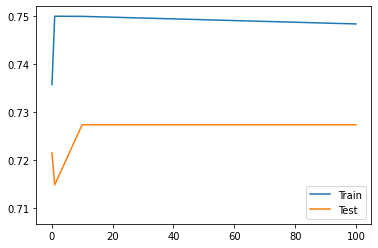

In [26]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_C'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_C'], result_grid['mean_test_score'], label="Test")
plt.legend()

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs={'C': randint(low=0.001, high=100)}

In [30]:
from sklearn.linear_model import LogisticRegression

In [32]:
random_search=RandomizedSearchCV(LogisticRegression(),param_distributions=param_distribs, cv=5, 
                                 # n_iter=100, 랜덤횟수 디폴트=10
                                return_train_score=True)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018EDFFD9C30>},
                   return_train_score=True)

In [34]:
print("best parameter: {}".format(random_search.best_params_))
print("best cross-validity score: {:.3f}".format(random_search.best_score_))

best parameter: {'C': 78}
best cross-validity score: 0.727


In [37]:
print("test set score: {:.3f}".format(random_search.score(x_test, y_test)))

test set score: 0.679


In [39]:
result_random = random_search.cv_results_
pd.DataFrame(result_random)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.017548,0.002727,0.001201,3.965414e-04,78,{'C': 78},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
1,0.014561,0.000798,0.000993,7.825942e-06,31,{'C': 31},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
2,0.015964,0.002267,0.000998,1.309350e-06,74,{'C': 74},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
3,0.015154,0.000733,0.001202,4.085551e-04,58,{'C': 58},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
4,0.014161,0.000746,0.000997,7.136645e-07,39,{'C': 39},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
5,0.014555,0.001488,0.001005,1.180170e-05,93,{'C': 93},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
6,0.012976,0.001081,0.000991,1.252276e-05,11,{'C': 11},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.779528,0.724409,0.749994,0.021586
7,0.013763,0.001465,0.001196,3.988778e-04,68,{'C': 68},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
8,0.013967,0.001413,0.000997,1.721904e-06,8,{'C': 8},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.779528,0.724409,0.749994,0.021586
9,0.012960,0.001093,0.001004,1.129873e-05,14,{'C': 14},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.779528,0.724409,0.749994,0.021586
